# задание 1

Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [90]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from scipy.stats.contingency import association

df_products = pd.read_csv("foodmart.products.csv")
df_sales = pd.read_csv("foodmart.sales.csv")

df = df_products.merge(df_sales, on="product_id")

In [91]:
sparse_sales = pd.pivot_table(
    df,
    values="sales",
    index=["date", "store_id"],
    columns=["product_name"],
    fill_value=0,
)

In [92]:
spearman_corr = sparse_sales.corr(method="spearman")

spearman_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,1.000000,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,1.000000,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,1.000000,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,1.000000,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.018996,0.013590,-0.016040,0.092713,0.062295,-0.015969,0.050453,-0.003126,-0.007714,0.042247,...,-0.032531,-0.053064,-0.007445,-0.002923,0.037459,1.000000,0.015116,0.018770,0.025268,0.013656
Washington Diet Soda,0.018471,0.040211,-0.003019,-0.007196,-0.021510,0.074140,0.053977,0.020414,0.013718,-0.007546,...,-0.039151,0.047079,0.107883,0.088316,-0.019259,0.015116,1.000000,-0.025042,0.014216,-0.039504
Washington Mango Drink,0.099764,0.022333,0.040994,0.059298,-0.007004,0.091507,0.056937,0.021470,0.075320,0.011497,...,-0.028520,-0.024756,-0.003357,0.041751,0.159320,0.018770,-0.025042,1.000000,-0.000819,-0.048897


In [93]:
pearson_corr = sparse_sales.corr(method="pearson")

pearson_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.028226,0.007142,0.013510,0.090774,0.045038,-0.019134,0.065257,0.008475,-0.014765,0.040917,...,-0.021486,-0.048885,-0.024276,0.014478,0.023574,1.000000,0.018490,0.047577,0.005696,0.027834
Washington Diet Soda,0.012653,0.035274,-0.017855,-0.031954,-0.037246,0.080757,0.066493,0.034888,-0.001253,0.008366,...,-0.025958,0.037920,0.111450,0.090849,0.023312,0.018490,1.000000,-0.030056,0.009293,-0.046996
Washington Mango Drink,0.089932,0.033875,0.022714,0.043843,0.025975,0.087489,0.068372,0.028454,0.080489,0.013144,...,-0.020503,-0.031946,-0.026589,0.026534,0.116748,0.047577,-0.030056,1.000000,0.014672,-0.051093


In [94]:
target = "American Chicken Hot Dogs"

s_ans = spearman_corr[target].drop(target).idxmax()
p_ans = pearson_corr[target].drop(target).idxmax()

In [95]:
"spearman", s_ans, float(spearman_corr[target][s_ans])

('spearman', 'Great Cranberry Muffins', 0.1981052950789763)

In [96]:
"pearson", p_ans, float(pearson_corr[target][p_ans])

('pearson', 'Mighty Good Monthly Home Magazine', 0.24026934048270548)

<Axes: xlabel='American Chicken Hot Dogs', ylabel='Mighty Good Monthly Home Magazine'>

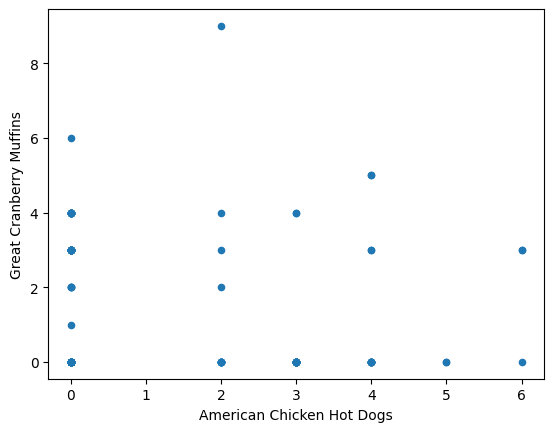

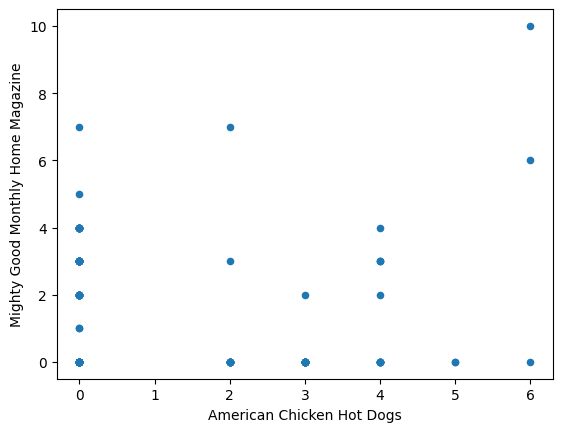

In [97]:
sparse_sales.plot.scatter(x=target, y=s_ans)
sparse_sales.plot.scatter(x=target, y=p_ans)

<Axes: xlabel='date'>

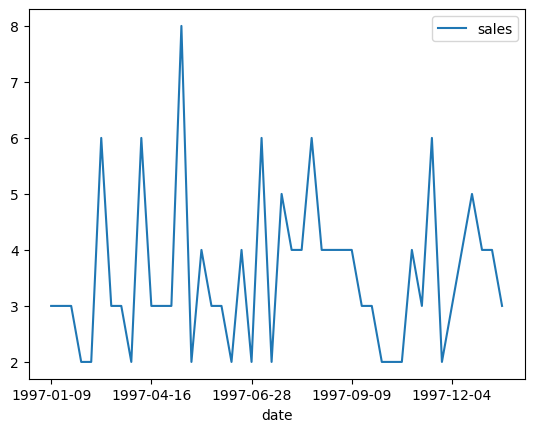

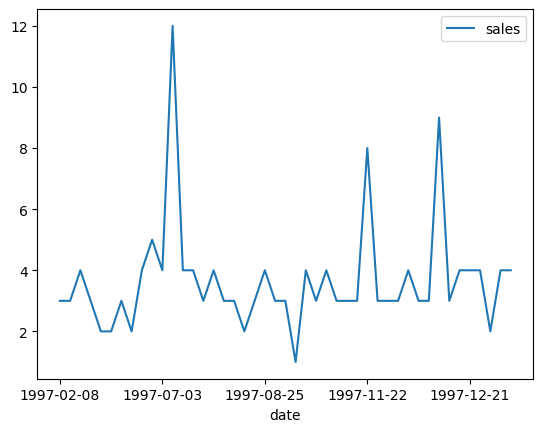

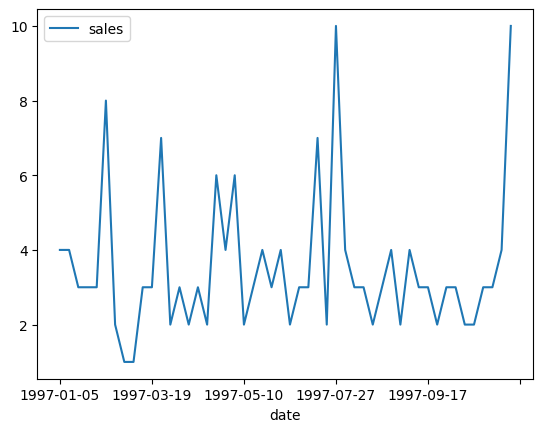

In [98]:
df[df["product_name"] == target][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")
df[df["product_name"] == s_ans][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")
df[df["product_name"] == p_ans][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")

In [ ]:
# matthews

matthews_corrcoef(df_products["low_fat"], df_products["recyclable_package"])

np.float64(-0.02675542252327238)

array([[<Axes: title={'center': 'low_fat'}>,
        <Axes: title={'center': 'recyclable_package'}>]], dtype=object)

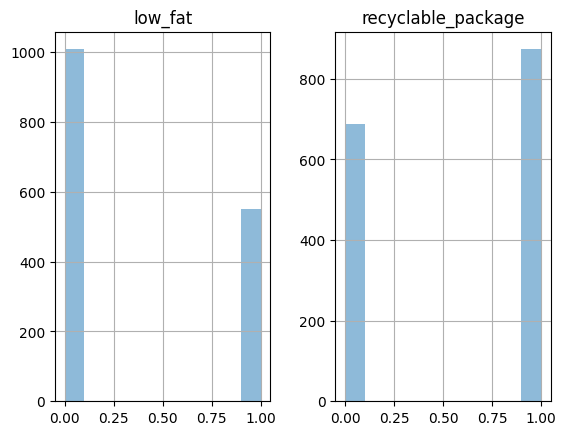

In [103]:
df_products[["low_fat", "recyclable_package"]].astype(float).hist(alpha=0.5)

In [109]:
crosstab = pd.crosstab(df["store_id"], df["brand_name"])

crosstab.head(5)

brand_name,ADJ,Akron,American,Amigo,Applause,Atomic,BBB Best,Best,Best Choice,Better,...,Thresher,Tip Top,Token,Top Measure,Toretti,Toucan,Tri-State,Urban,Walrus,Washington
store_id,,,,,,,,,,,,,,,,,,,,,
2,2,3,17,1,3,5,25,2,39,19,...,4,0,13,4,0,2,27,1,6,8
3,4,13,71,11,13,50,159,13,151,123,...,42,7,69,34,1,16,214,29,43,45
6,8,9,61,12,6,28,141,19,132,73,...,32,9,59,30,4,8,172,24,40,47
7,7,12,74,6,10,49,171,15,163,105,...,36,6,55,39,5,6,215,27,42,53
11,9,15,70,14,12,47,147,18,183,136,...,43,6,55,40,6,10,216,27,39,49


In [ ]:
# cramer

association(crosstab, method="cramer")

0.0343024046787291

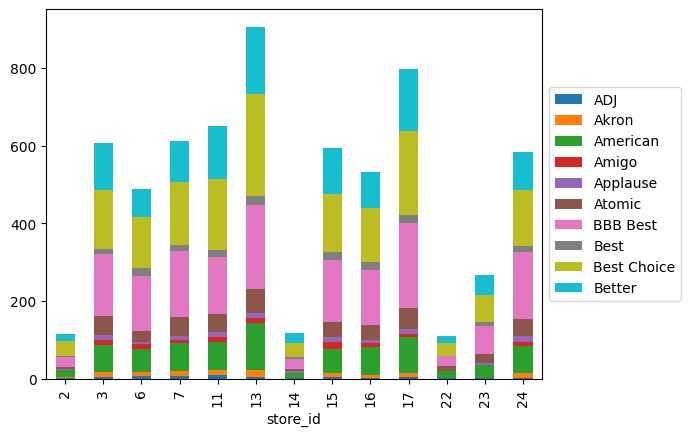

In [ ]:
crosstab.iloc[:, :10].plot.bar(stacked=True).legend(
    loc="center left", 
    bbox_to_anchor=(1, 0.5),
)

# задание 2

## описание задачи

В этом задании необходимо достичь максимального качества предсказания, используя навыки полученные за 4 недели обучения

Кто достигнет максимального значения на тестовой выборке, получит *15 баллов*

Пожалуйста, оформляйте ноутбук аккуратно. Все выводы подписывайте, оформляйте заголовки.

Для справедливой оценки все должны использовать одну и ту же часть исходного датасета в качестве тестового набора данных. Используйте разбиение приведенное ниже


```
train_test_split(X, y, test_size = 0.3, random_state = 69, stratify = y)
```
И модель, с которой вы работаете - это линейнаяэ регрессия. Другие алгоритмы не используйте.

Метрика, которую вы должны максимизировать

```
f1_score(y_test, y_pred, average='weighted')
```

Целевая переменная - *count*

Обратите внимание на столбцы - 'casual', 'registered'. Эти столбцы в сумме дают целевую переменную, по этой причине их надо удалить. Они линейно зависимы.




Используйтие средства библиотеки sklearn, внимательно изучите ее. Существует огромное количество методов для выполнения каждого из этапов, не бойтесь использовать методы неприведенные в лекции

Этапы, которые необходимо проделать в работе для успешного достижения результата:
* EDA (Исследовать данные, понять с чем имеете дело, наработать идеи для генерации фичей и их обработки, обязательно корреляционные матрицы и графики с hue=классы объектов)
* Анализ выбросов и их обработка (в задачах классификации выброс - это объект с таким признаковым описанием, которое отличается очень сильно от типичного и больше соответствует другому классу)
* Генерация новых фичей (думайте нетривиально, даю подсказку одной фичи - обратитесь к библиотеке holidays)
* Обработка пропусков (вы можете сгенерировать новые фичи с пропусками, тогда надо подумать об их обработке)
* Обработка категориальных признаков
* Масштабирование вещественных признаков
* Трансформирование таргета (необязательно; метрику нужно считать не с измененным таргетом)
* Балансировка классов
* Нелинейные автоматические трансформации признаков (Kernel Trick, Transformers)
* Подбор параметров модели (можете менять не только константы, но и оптимизационные алгоритмы и методы регуляризации)
* Отбор признаков
* Составление пайплайна обучения
* Обязательно: Постройте график зависимости y_pred от y_true в разбиении на test и train. Предсказание идеального алгоритма даст прямую y=x, посмотрите какой график получается у вас.

## Bike Sharing Demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные.

### Библиотеки

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pd.read_csv(
    "/content/drive/MyDrive/Занятия. Осенний семестр/Домашние работы/Лекция 4. Отбор признаков и пайплайн обучения/bike_sharing_demand.csv"
)

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals